In [9]:
import os
import sys
import json
import numpy as np
import pandas as pd
from decouple import config
# MAIN_PATH = config('MAIN_PATH')
MAIN_PATH = r'C:\Users\jtrim\OneDrive\Documents\COMP4550\RL4T1D'
sys.path.insert(1, MAIN_PATH)
from visualiser.core import ExperimentVisualise, plot_testing_rewards, plot_training_logs, plot_value_function
from visualiser.core import plot_episode, plot_training_action_summary, plot_training_logs
from visualiser.core import display_commands, plot_testing_metric, display_commands_v2, plot_testing_average_metric
import matplotlib.gridspec
%matplotlib inline 

# FOLDER = 'nci/May12/adult_easy/'
# ALGO = 'G'
# SUBJECT = '6'
# PATH = FOLDER+ALGO+SUBJECT
# COHORT = 'Adult'

FOLDER = 'Aug24_04/'
ALGO = 'IS'
SUBJECT = '0'
# PATH = FOLDER+ALGO+SUBJECT
COHORT = 'Adult'

PATH = 'test000'

LABEL = COHORT+SUBJECT

exp1 = ExperimentVisualise(id=PATH, version=1.1, plot_version=1, test_seeds=5000)
exp2 = ExperimentVisualise(id=PATH+'_2', version=1.1, plot_version=1, test_seeds=5000)
exp3 = ExperimentVisualise(id=PATH+'_3', version=1.1, plot_version=1, test_seeds=5000)

# plot the graphs
command = []
dis_len = 1.0 * 1000000
disp_arr = display_commands_v2(command)
exp_vis = {
             '1':{ "id":exp1, "color":'r',"show": disp_arr[1], "label":LABEL}, 
             '2':{ "id":exp2, "color":'g',"show": disp_arr[2], "label":LABEL},  
             '3':{ "id":exp3, "color":'b',"show": disp_arr[3], "label":LABEL}, 
}
# average metric
plot_testing_average_metric(exp_vis, [['1', '2', '3']], type='normal', dis_len=dis_len, metric='reward', goal=312, fill=True)

#individual seed metrics
plot_testing_metric(exp_vis, type='normal', dis_len=dis_len, metric='reward', goal=312, fill=False, label=False)  # normal
plot_testing_metric(exp_vis, type='min_max', dis_len=dis_len, metric='aBGP_rmse', goal=15, fill=False)
#plot_testing_metric(exp_vis, type='min_max', dis_len=dis_len, metric='cBGP_rmse', goal=10, fill=False)
# plot_testing_metric(exp_vis, type='min_max', dis_len=dis_len, metric='normo', goal=70, fill=False)  # normal
plot_testing_metric(exp_vis, type='min_max', dis_len=dis_len, metric='ri', goal=5, fill=False)
plot_testing_metric(exp_vis, type='min_max', dis_len=dis_len, metric='hgbi', goal=5, fill=False)
plot_testing_metric(exp_vis, type='min_max', dis_len=dis_len, metric='lgbi', goal=1.1, fill=False)
#plot_training_logs(exp_vis, dis_len, version=3)

params = ['exp_var', 'true_var','val_loss', 'policy_grad', 'value_grad'] #, 'pi_loss'
plot_training_logs(mode='ppo', exp_dict=exp_vis, dis_len=dis_len, params=params)
params = ['pi_aux_grad'] #'pi_aux_loss', 'vf_aux_loss', vf_aux_grad 
plot_training_logs(mode='aux', exp_dict=exp_vis, dis_len=250, params=params)
params = ['plan_grad', 'plan_loss'] 
# plot_training_logs(mode='planning', exp_dict=exp_vis, dis_len=250, params=params)    

KeyError: 'n_training_workers'


 Experiment summary...
{'epi': {195: 197}, 't': {195: 288}, 'reward': {195: 274.53537}, 'normo': {195: 76.38888888888889}, 'hypo': {195: 0.0}, 'sev_hypo': {195: 0.0}, 'hyper': {195: 23.61111111111111}, 'lgbi': {195: 0.41290462}, 'hgbi': {195: 6.0406384}, 'ri': {195: 6.453543}, 'sev_hyper': {195: 0.0}, 'aBGP_rmse': {195: 3.738373}, 'cBGP_rmse': {195: 5.6191535}}
{'epi': {195: 197}, 't': {195: 288}, 'reward': {195: 275.4983}, 'normo': {195: 78.125}, 'hypo': {195: 0.0}, 'sev_hypo': {195: 0.0}, 'hyper': {195: 21.875}, 'lgbi': {195: 0.3613667}, 'hgbi': {195: 5.256441}, 'ri': {195: 5.617808}, 'sev_hyper': {195: 0.0}, 'aBGP_rmse': {195: 3.7234147}, 'cBGP_rmse': {195: 5.7087183}}
{'epi': {195: 197}, 't': {195: 288}, 'reward': {195: 271.84055}, 'normo': {195: 68.05555555555556}, 'hypo': {195: 5.902777777777778}, 'sev_hypo': {195: 0.0}, 'hyper': {195: 26.041666666666668}, 'lgbi': {195: 4.366522}, 'hgbi': {195: 6.0691323}, 'ri': {195: 10.435654}, 'sev_hyper': {195: 0.0}, 'aBGP_rmse': {195: 4.810

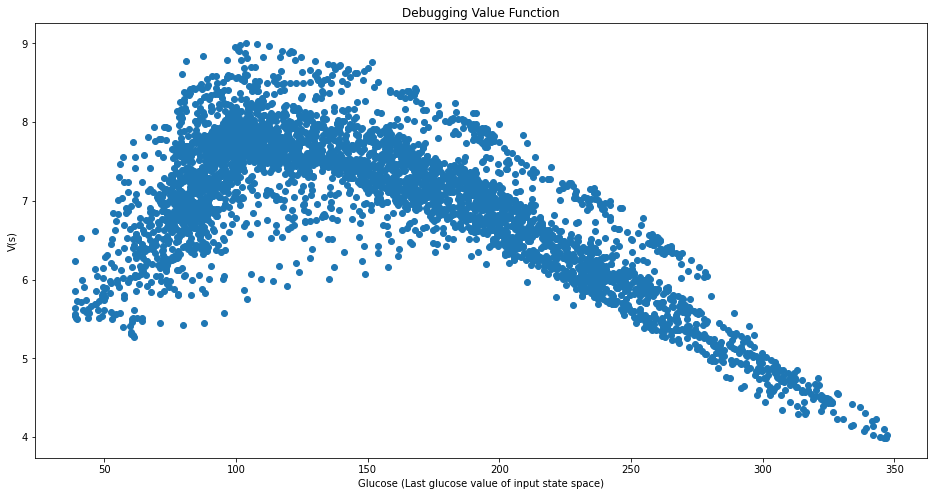

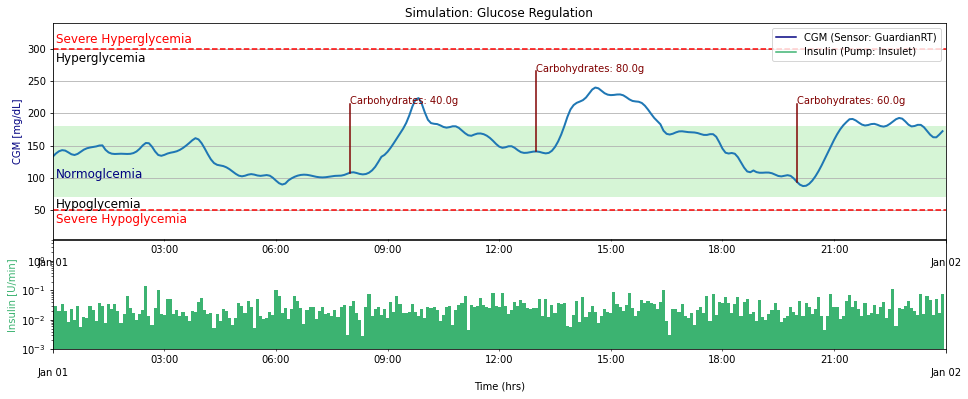

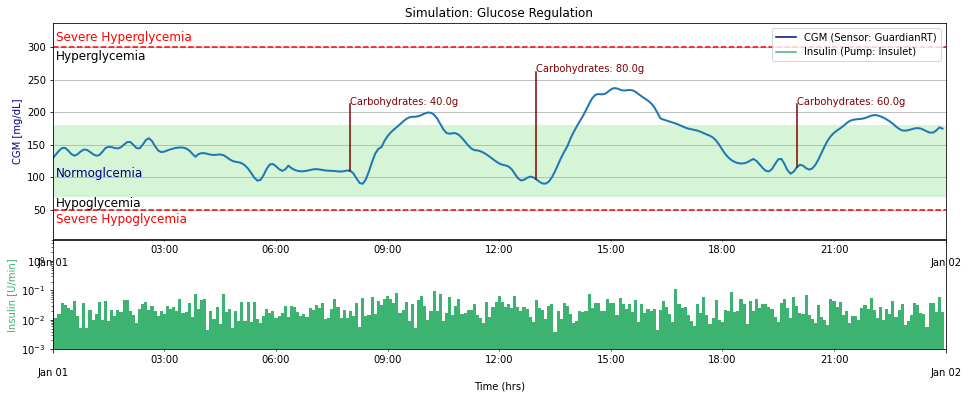

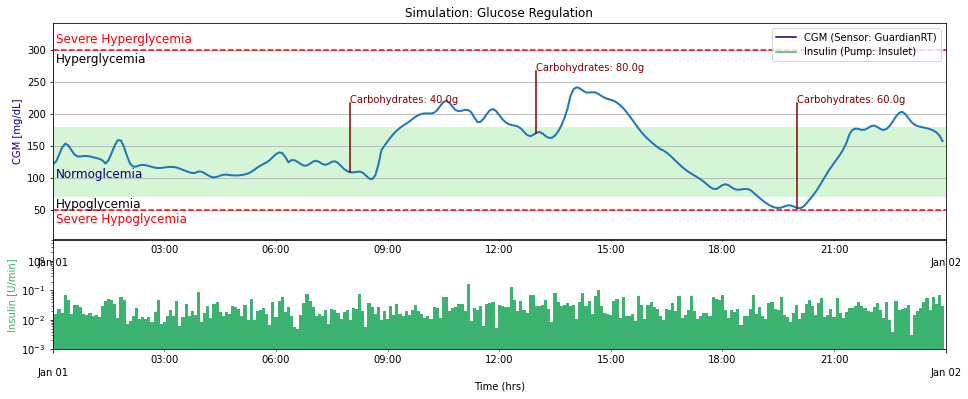

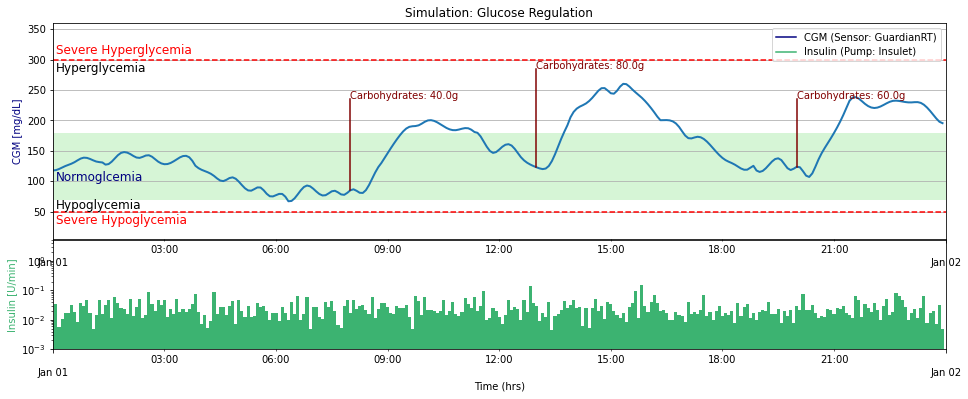

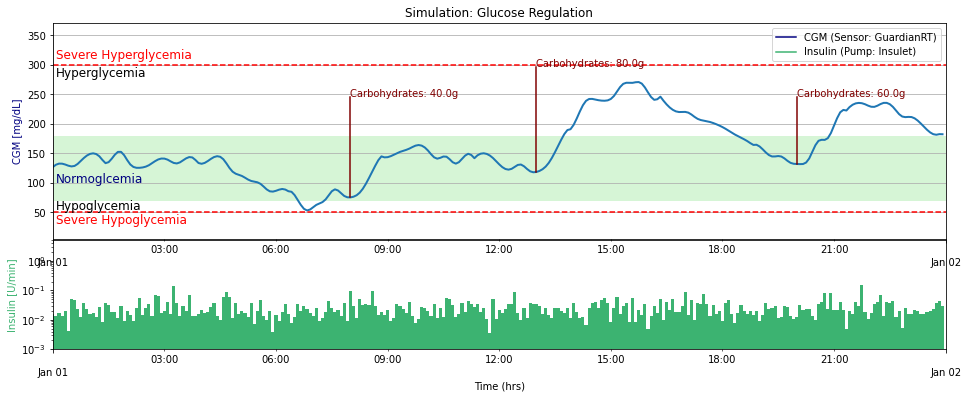

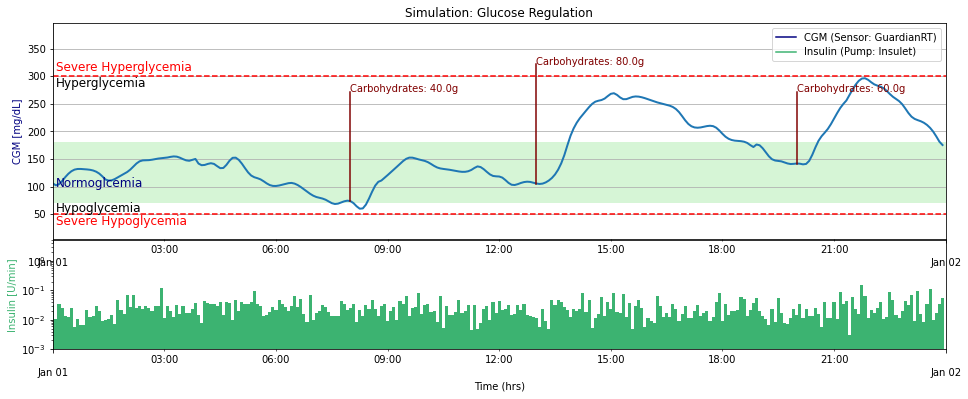

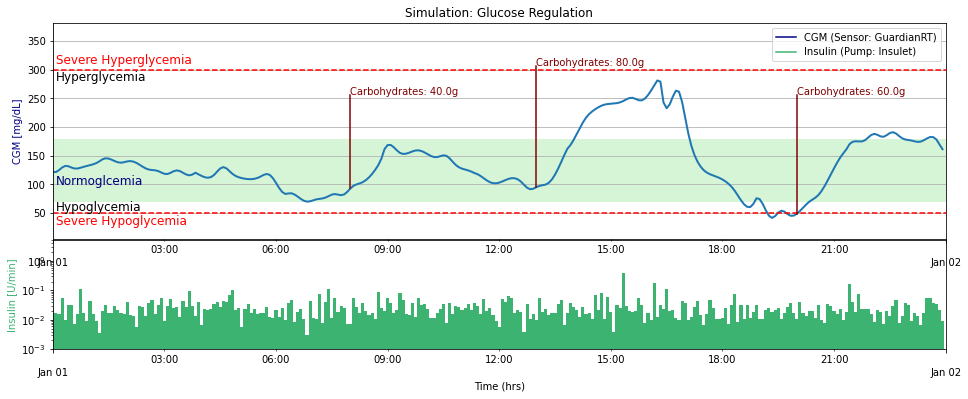

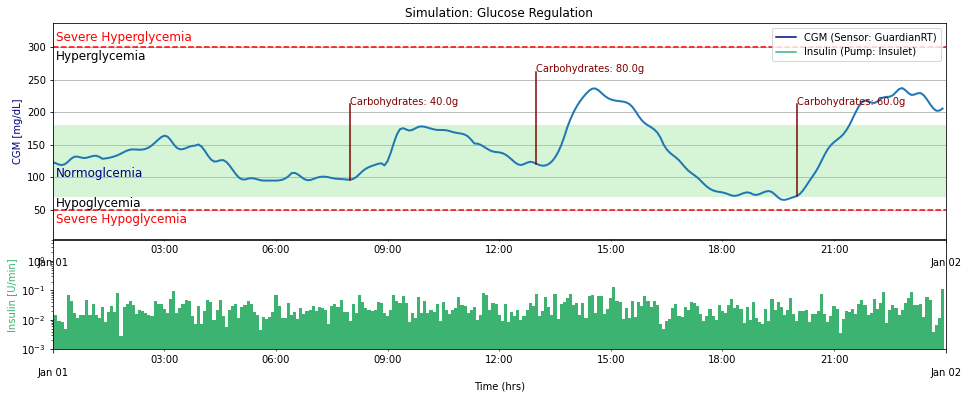

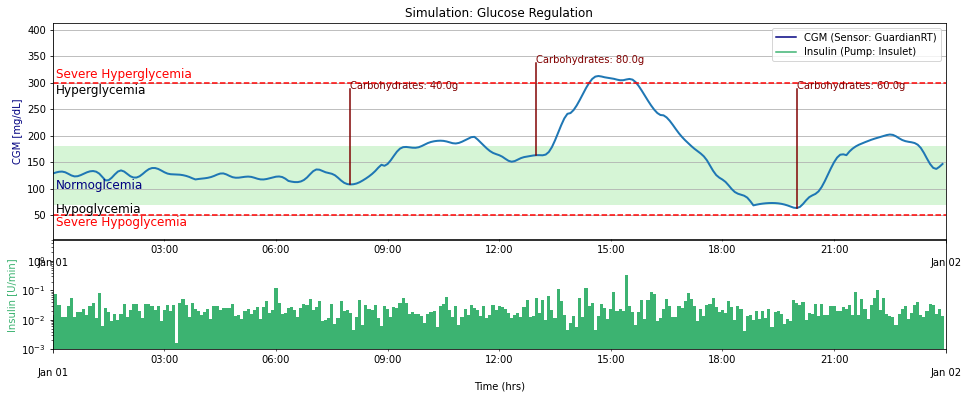

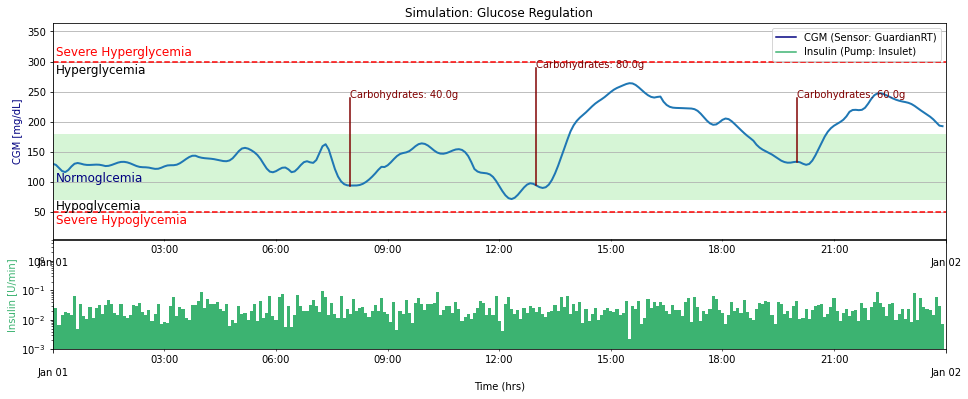

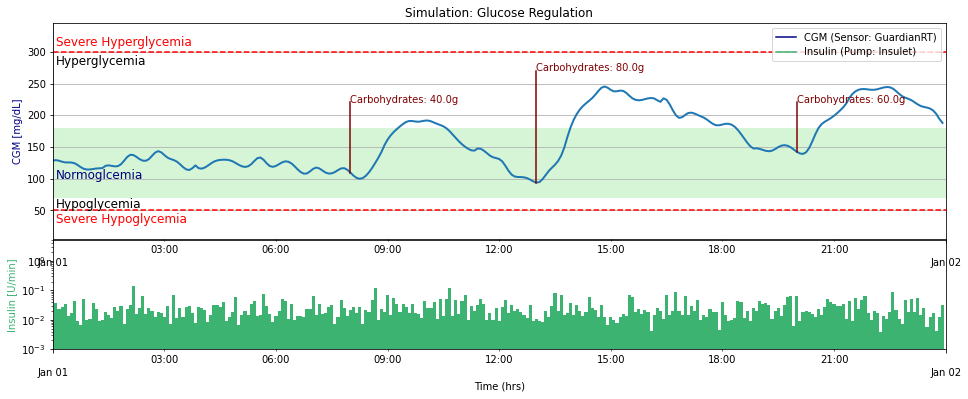

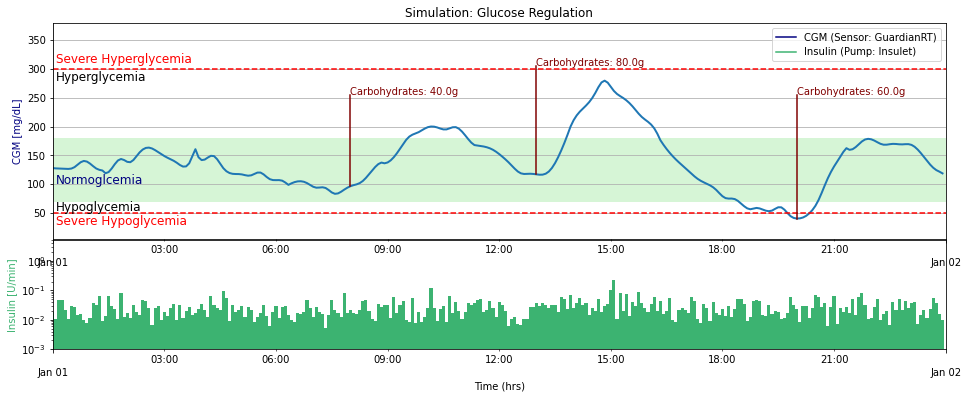

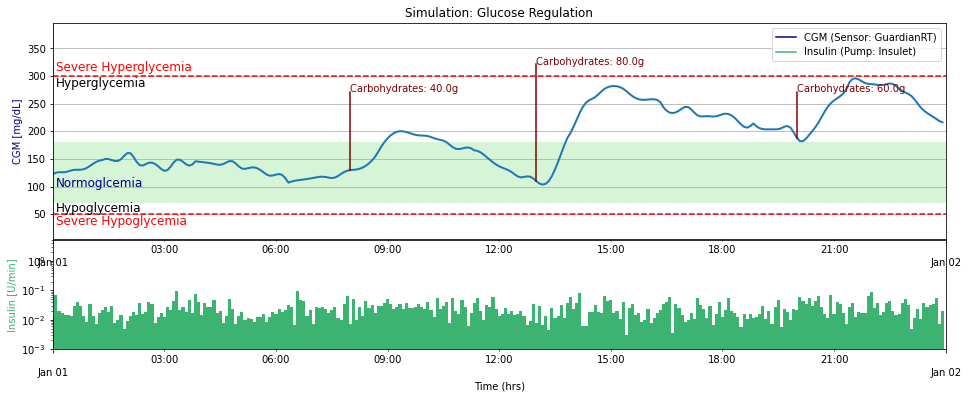

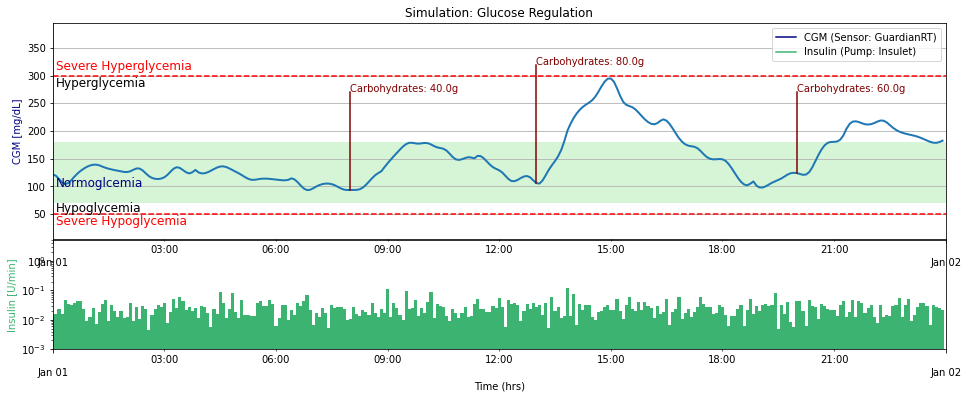

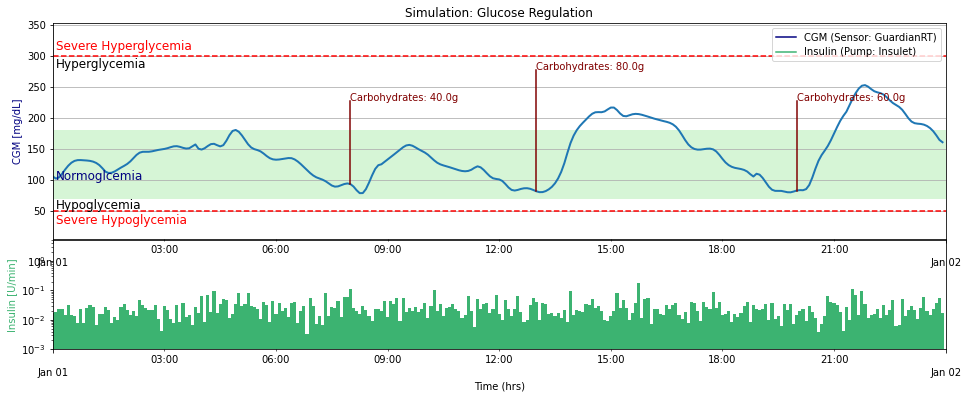

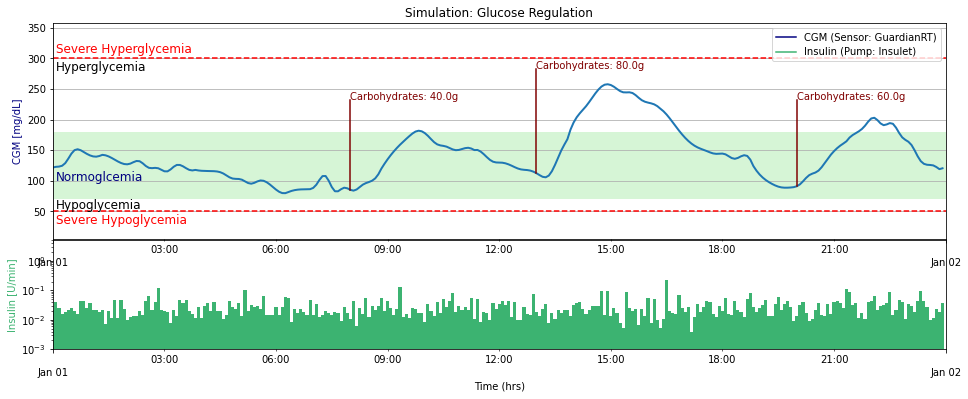

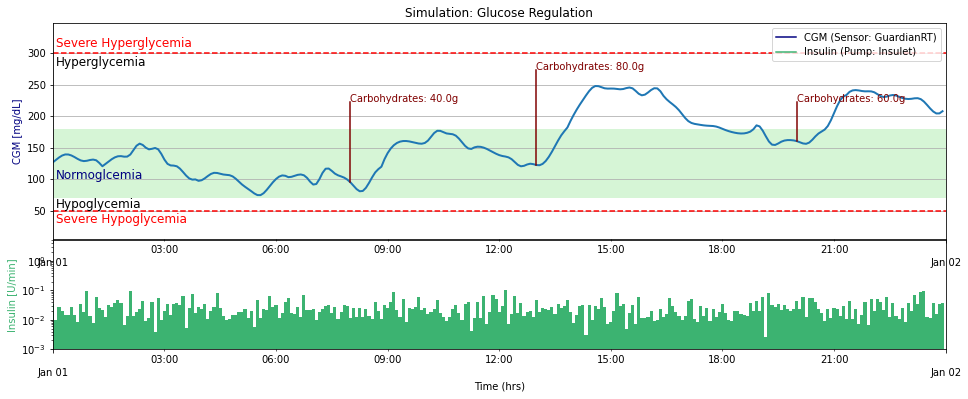

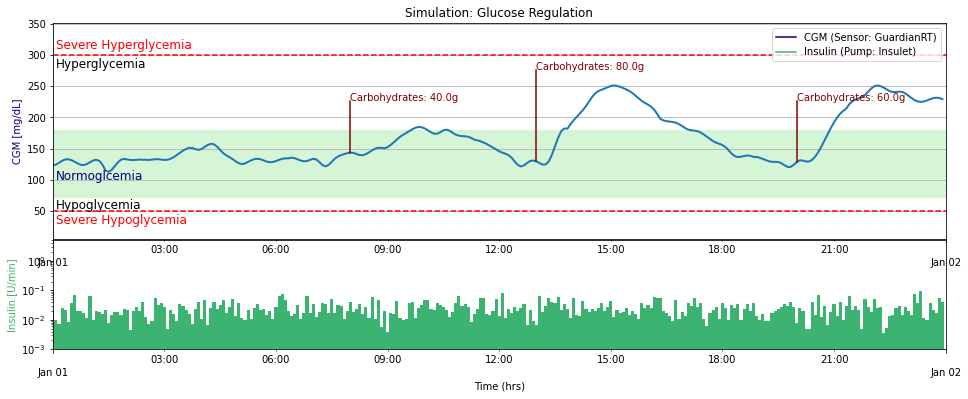

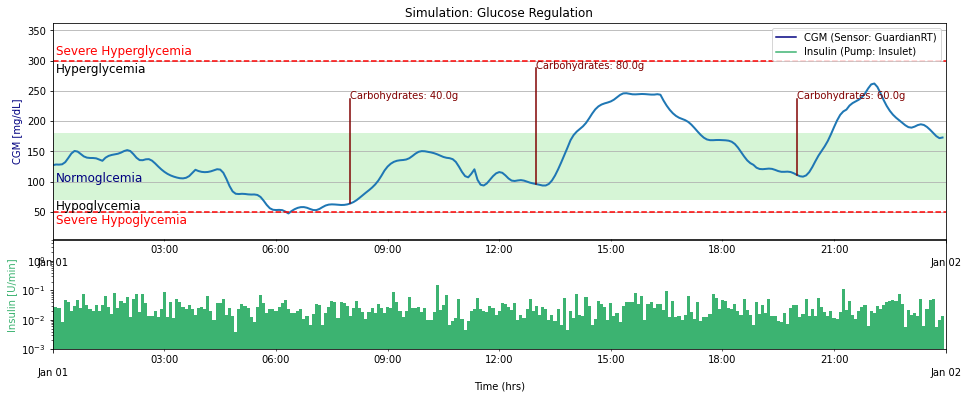

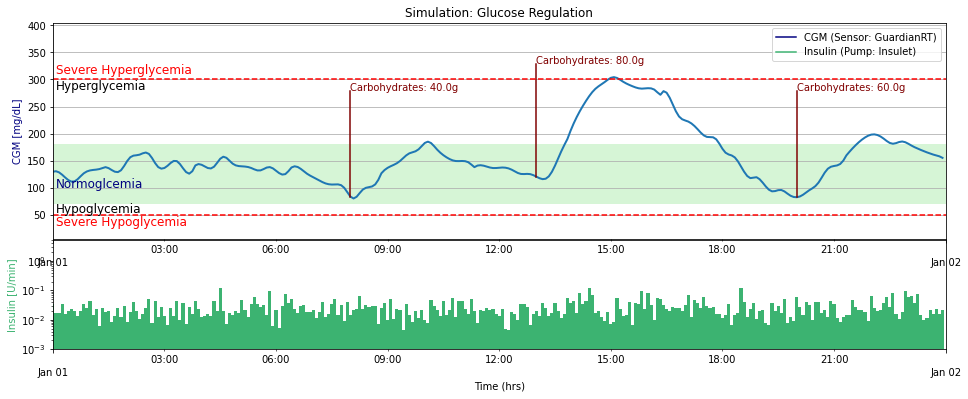

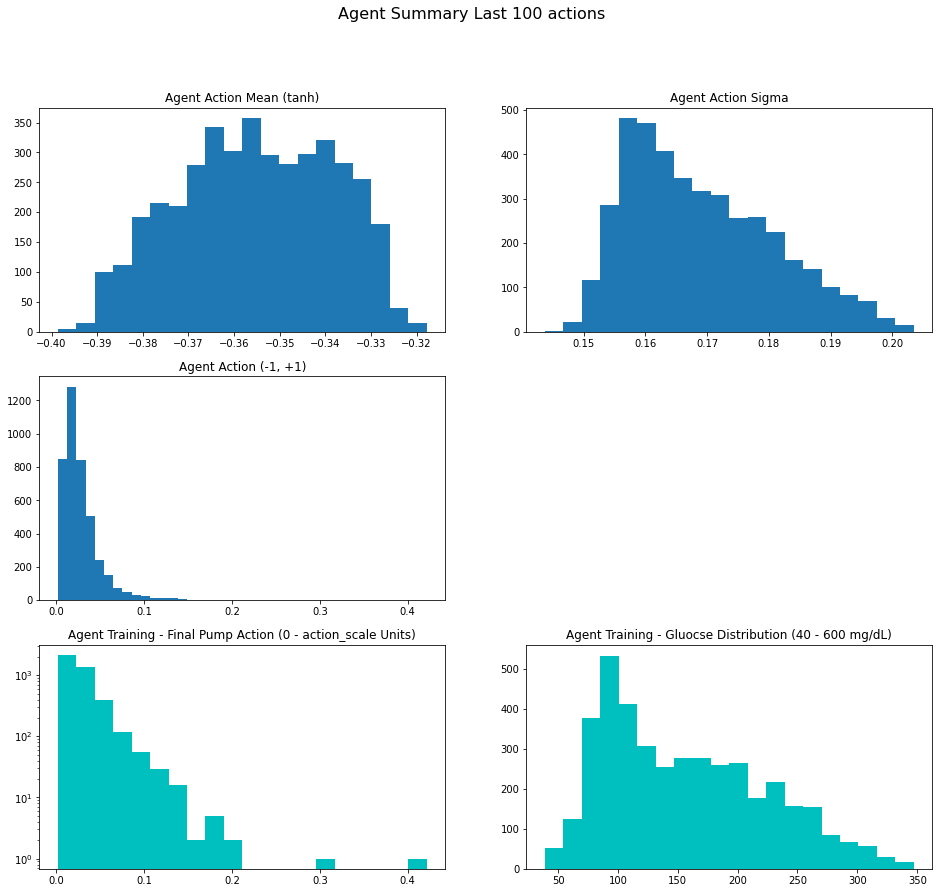

In [2]:
## debugging a given experiment
target_exp = exp1
latest_epi = target_exp.get_summary()
target_epi = latest_epi
plot_value_function(target_exp, horizon=256)
for t in range(0, target_exp.testing_workers):
    plot_episode(target_exp, tester=t, episode=target_epi)
plot_training_action_summary(target_exp, horizon=256)

real
690
           normo       hypo      hyper   sev_hypo  sev_hyper       lgbi  \
mean   71.053131   2.187724  24.952614   0.332676   1.473854   2.864151   
std    12.890716   3.592842  10.296977   1.084217   5.112085   3.235323   
min     8.860760   0.000000   0.000000   0.000000   0.000000   0.000000   
max   100.000000  30.769230  71.551730  16.959064  80.590710  22.051207   

           hgbi         ri  
mean   7.620674  10.484825  
std    3.924464   6.169289  
min    1.789013   1.845144  
max   57.820187  76.844830  
quadratic
328
           normo       hypo      hyper   sev_hypo  sev_hyper       lgbi  \
mean   69.360132   1.064259  27.490189   0.161047   1.924372   1.790704   
std    12.350792   2.620374  10.311082   0.791841   5.182413   2.688906   
min     9.282701   0.000000   0.000000   0.000000   0.000000   0.000000   
max   100.000000  22.115385  69.551285  14.705882  80.590710  22.915808   

           hgbi         ri  
mean   8.071870   9.862574  
std    3.850129   5.74

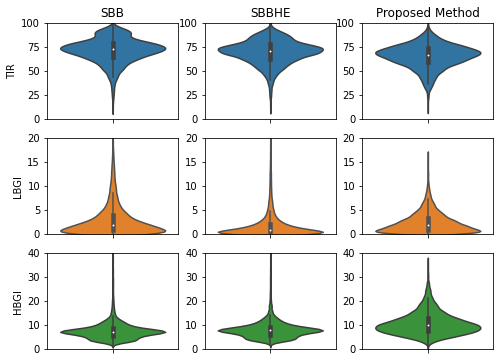

In [107]:
import matplotlib.pyplot as plt
import seaborn as sns


filter_bad = False

target_metrics = ['normo', 'hypo', 'hyper', 'sev_hypo', 'sev_hyper', 'lgbi', 'hgbi', 'ri']
FOLDER_PATH='/results/embc14_real'
control_type = 'real'
f1 = pd.read_csv(MAIN_PATH +FOLDER_PATH+ '/'+control_type+'.csv')
failures = f1[f1['survival'] < 312].count()['survival']
print('real')
print(failures)
if filter_bad:
    f1 = f1[f1['survival'] == 312]
t1 = f1[target_metrics].describe().loc[['mean', 'std', 'min', 'max']]
print(t1)

FOLDER_PATH='/results/embc14_quadratic'
control_type = 'quadratic'
f2 = pd.read_csv(MAIN_PATH +FOLDER_PATH+ '/'+control_type+'.csv')
failures = f2[f2['survival'] < 312].count()['survival']
print('quadratic')
print(failures)
if filter_bad:
    f2 = f2[f2['survival'] == 312]
t2 = f2[target_metrics].describe().loc[['mean', 'std', 'min', 'max']]
print(t2)

if filter_bad:
    sum_stats = sum_stats[sum_stats['t'] == 312]
c = sns.color_palette() 

fig = plt.figure(figsize=(8, 6))
plt.subplot(3, 3, 1)
g2 = sns.violinplot(y=f1['normo'])
g2.set(ylabel="TIR")
g2.set(ylim=(0, 100))
plt.title("SBB")

plt.subplot(3, 3, 2)
g2 = sns.violinplot(y=f2['normo'])
g2.set(ylabel=None)
g2.set(ylim=(0, 100))
plt.title("SBBHE")
#plt.ylabel()

plt.subplot(3, 3, 3)
g2 = sns.violinplot(y=sum_stats['normo'])
g2.set(ylabel=None)
g2.set(ylim=(0, 100))
plt.title("Proposed Method")

plt.subplot(3, 3, 4)
g2 = sns.violinplot(y=f1['lgbi'], color=c[1])
g2.set(ylabel="LBGI")
g2.set(ylim=(0, 20))

plt.subplot(3, 3, 5)
g2 = sns.violinplot(y=f2['lgbi'], color=c[1])
g2.set(ylabel=None)
g2.set(ylim=(0, 20))

plt.subplot(3, 3, 6)
g2 = sns.violinplot(y=sum_stats['lgbi'], color=c[1])
g2.set(ylabel=None)
g2.set(ylim=(0, 20))

plt.subplot(3, 3, 7)
g2 = sns.violinplot(y=f1['hgbi'], color=c[2])
g2.set(ylabel="HBGI")
g2.set(ylim=(0, 40))


plt.subplot(3, 3, 8)
g2 = sns.violinplot(y=f2['hgbi'], color=c[2])
g2.set(ylabel=None)
g2.set(ylim=(0, 40))

plt.subplot(3, 3, 9)
g2 = sns.violinplot(y=sum_stats['hgbi'], color=c[2])
g2.set(ylabel=None)
g2.set(ylim=(0, 40))

# sns.violinplot(y=sum_stats['normo'])
#axes.violinplot(dataset = [sum_stats['normo'].values],  showmedians=True, showmeans=True)
# axes.set_xticks([1])
# axes.set_xticklabels(["Normoglyceamia", ])
plt.show()


# boxplot = sum_stats.boxplot(column=['normo', 'lgbi', 'hgbi'])
# fig, axes = plt.subplots()
# axes.violinplot(dataset = [sum_stats['lgbi'].values, sum_stats['hgbi'].values], showmedians=True)
# plt.show()